In [1]:
import sys
sys.path.append("..")

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

/mnt/home/20180878/anaconda3/envs/slava/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from DatasetLoader import get_data_loader
import torchvision.transforms as transforms
import utils
config = utils.load_yaml("../experiments/baseline.yaml")

train_transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Resize(256),
         transforms.RandomCrop([224,224]),
         transforms.RandomHorizontalFlip(p=0.3),
         transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

config['dataloader']['train_path'] = "../data/train" 
config['dataloader']['nPerClass'] = 5
config['dataloader']['batch_size'] = 4
trainLoader = get_data_loader(transform=train_transform, **config['dataloader'])


83298 files from 1230 classes found.


In [5]:
data,labels=next(iter(trainLoader))
data = data.reshape(-1,data.size()[-3],data.size()[-2],data.size()[-1])
labels = labels.view(-1)

tensor([1165, 1165, 1165, 1165, 1165,  937,  937,  937,  937,  937,  619,  619,
         619,  619,  619,  256,  256,  256,  256,  256])


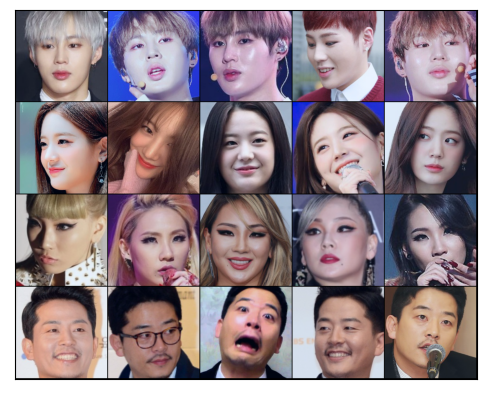

In [6]:
from torchvision.utils import make_grid
grid = make_grid(data, nrow=5, normalize=True)
print(labels)
show(grid)